## Data preprocessing

In [6]:
from __future__ import print_function

# We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

import pandas as pd

## Utilities

In [37]:
class MFCCMachine(object):
    def __init__(self, audio_path, genre='', number=None):
        self.audio_path = audio_path
        self.genre = genre
        self.number = number if number is not None else ''
        
    def process_mfcc(self, duration=5, start=0):
        self.y, self.sr = librosa.load(self.audio_path, duration=start+duration)
        self.y = self.y[int(self.y.shape[0]/(start+duration)*start):]
        S = librosa.feature.melspectrogram(self.y, sr=self.sr, n_mels=128)
        log_S = librosa.power_to_db(S, ref=np.max)

        self.mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)
        self.delta_mfcc  = librosa.feature.delta(self.mfcc)
        self.delta2_mfcc = librosa.feature.delta(self.mfcc, order=2)
        
    def plot_mfcc(self, figsize, show=True):
        fig = plt.figure(figsize=(figsize, 6))

        plt.subplot(3,1,1)
        librosa.display.specshow(self.mfcc)
        plt.ylabel('MFCC')
        plt.colorbar()

        plt.subplot(3,1,2)
        librosa.display.specshow(self.delta_mfcc)
        plt.ylabel('MFCC-$\Delta$')
        plt.colorbar()

        plt.subplot(3,1,3)
        librosa.display.specshow(self.delta2_mfcc, sr=self.sr, x_axis='time')
        plt.ylabel('MFCC-$\Delta^2$')
        plt.colorbar()

        plt.tight_layout()
        if self.genre != '' and self.number != '':
            fig.suptitle(self.genre + ' - ' + self.number, fontsize=20)
        if not show:
            plt.close()
        return fig

## Data

In [8]:
sample_path = 'D:\\skola\\VMM\\DataSet\\mfcc\\input\\genres\\'
data_path = 'D:\\skola\\MVI\\mvi-sp\\data\\'
all_genres = ['blues','country','pop','reggae','rock','classical','disco','hiphop','jazz','metal']
number_of_samples = range(0,100)

## Příklad

In [9]:
def run(genres, numbers, duration=5, start=0, figsize=12, save=False, show=True):
    for genre in genres:
        for i in numbers:
            audio_path = sample_path + genre + '\\' + genre + '.' + str(i).zfill(5) + '.au'
            print(audio_path)
            machine = MFCCMachine(audio_path,genre,str(i))
            machine.process_mfcc(duration=duration, start=start)
            fig = machine.plot_mfcc(figsize=figsize, show=show)
            if save:
#                 fig.savefig(sample_path + genre + '\\' + genre + '.' + str(i).zfill(5) + '.png')
                file_path = data_path + genre + '\\' + genre + '.' + str(i).zfill(5)
                print(file_path+'.npy')
                np.save(file_path, machine.mfcc)

In [12]:
genres = ['hiphop']
# num = 20
numbers = range(31,32)

In [38]:
run(all_genres, number_of_samples, duration=10, start=15, save=True, show=False)

D:\skola\VMM\DataSet\mfcc\input\genres\blues\blues.00000.au
D:\skola\MVI\mvi-sp\data\blues\blues.00000.npy
D:\skola\VMM\DataSet\mfcc\input\genres\blues\blues.00001.au
D:\skola\MVI\mvi-sp\data\blues\blues.00001.npy
D:\skola\VMM\DataSet\mfcc\input\genres\blues\blues.00002.au
D:\skola\MVI\mvi-sp\data\blues\blues.00002.npy
D:\skola\VMM\DataSet\mfcc\input\genres\blues\blues.00003.au
D:\skola\MVI\mvi-sp\data\blues\blues.00003.npy
D:\skola\VMM\DataSet\mfcc\input\genres\blues\blues.00004.au
D:\skola\MVI\mvi-sp\data\blues\blues.00004.npy
D:\skola\VMM\DataSet\mfcc\input\genres\blues\blues.00005.au
D:\skola\MVI\mvi-sp\data\blues\blues.00005.npy
D:\skola\VMM\DataSet\mfcc\input\genres\blues\blues.00006.au
D:\skola\MVI\mvi-sp\data\blues\blues.00006.npy
D:\skola\VMM\DataSet\mfcc\input\genres\blues\blues.00007.au
D:\skola\MVI\mvi-sp\data\blues\blues.00007.npy
D:\skola\VMM\DataSet\mfcc\input\genres\blues\blues.00008.au
D:\skola\MVI\mvi-sp\data\blues\blues.00008.npy
D:\skola\VMM\DataSet\mfcc\input\genre

D:\skola\MVI\mvi-sp\data\blues\blues.00077.npy
D:\skola\VMM\DataSet\mfcc\input\genres\blues\blues.00078.au
D:\skola\MVI\mvi-sp\data\blues\blues.00078.npy
D:\skola\VMM\DataSet\mfcc\input\genres\blues\blues.00079.au
D:\skola\MVI\mvi-sp\data\blues\blues.00079.npy
D:\skola\VMM\DataSet\mfcc\input\genres\blues\blues.00080.au
D:\skola\MVI\mvi-sp\data\blues\blues.00080.npy
D:\skola\VMM\DataSet\mfcc\input\genres\blues\blues.00081.au
D:\skola\MVI\mvi-sp\data\blues\blues.00081.npy
D:\skola\VMM\DataSet\mfcc\input\genres\blues\blues.00082.au
D:\skola\MVI\mvi-sp\data\blues\blues.00082.npy
D:\skola\VMM\DataSet\mfcc\input\genres\blues\blues.00083.au
D:\skola\MVI\mvi-sp\data\blues\blues.00083.npy
D:\skola\VMM\DataSet\mfcc\input\genres\blues\blues.00084.au
D:\skola\MVI\mvi-sp\data\blues\blues.00084.npy
D:\skola\VMM\DataSet\mfcc\input\genres\blues\blues.00085.au
D:\skola\MVI\mvi-sp\data\blues\blues.00085.npy
D:\skola\VMM\DataSet\mfcc\input\genres\blues\blues.00086.au
D:\skola\MVI\mvi-sp\data\blues\blues.

D:\skola\MVI\mvi-sp\data\country\country.00050.npy
D:\skola\VMM\DataSet\mfcc\input\genres\country\country.00051.au
D:\skola\MVI\mvi-sp\data\country\country.00051.npy
D:\skola\VMM\DataSet\mfcc\input\genres\country\country.00052.au
D:\skola\MVI\mvi-sp\data\country\country.00052.npy
D:\skola\VMM\DataSet\mfcc\input\genres\country\country.00053.au
D:\skola\MVI\mvi-sp\data\country\country.00053.npy
D:\skola\VMM\DataSet\mfcc\input\genres\country\country.00054.au
D:\skola\MVI\mvi-sp\data\country\country.00054.npy
D:\skola\VMM\DataSet\mfcc\input\genres\country\country.00055.au
D:\skola\MVI\mvi-sp\data\country\country.00055.npy
D:\skola\VMM\DataSet\mfcc\input\genres\country\country.00056.au
D:\skola\MVI\mvi-sp\data\country\country.00056.npy
D:\skola\VMM\DataSet\mfcc\input\genres\country\country.00057.au
D:\skola\MVI\mvi-sp\data\country\country.00057.npy
D:\skola\VMM\DataSet\mfcc\input\genres\country\country.00058.au
D:\skola\MVI\mvi-sp\data\country\country.00058.npy
D:\skola\VMM\DataSet\mfcc\inp

D:\skola\MVI\mvi-sp\data\pop\pop.00025.npy
D:\skola\VMM\DataSet\mfcc\input\genres\pop\pop.00026.au
D:\skola\MVI\mvi-sp\data\pop\pop.00026.npy
D:\skola\VMM\DataSet\mfcc\input\genres\pop\pop.00027.au
D:\skola\MVI\mvi-sp\data\pop\pop.00027.npy
D:\skola\VMM\DataSet\mfcc\input\genres\pop\pop.00028.au
D:\skola\MVI\mvi-sp\data\pop\pop.00028.npy
D:\skola\VMM\DataSet\mfcc\input\genres\pop\pop.00029.au
D:\skola\MVI\mvi-sp\data\pop\pop.00029.npy
D:\skola\VMM\DataSet\mfcc\input\genres\pop\pop.00030.au
D:\skola\MVI\mvi-sp\data\pop\pop.00030.npy
D:\skola\VMM\DataSet\mfcc\input\genres\pop\pop.00031.au
D:\skola\MVI\mvi-sp\data\pop\pop.00031.npy
D:\skola\VMM\DataSet\mfcc\input\genres\pop\pop.00032.au
D:\skola\MVI\mvi-sp\data\pop\pop.00032.npy
D:\skola\VMM\DataSet\mfcc\input\genres\pop\pop.00033.au
D:\skola\MVI\mvi-sp\data\pop\pop.00033.npy
D:\skola\VMM\DataSet\mfcc\input\genres\pop\pop.00034.au
D:\skola\MVI\mvi-sp\data\pop\pop.00034.npy
D:\skola\VMM\DataSet\mfcc\input\genres\pop\pop.00035.au
D:\skola\M

D:\skola\MVI\mvi-sp\data\reggae\reggae.00007.npy
D:\skola\VMM\DataSet\mfcc\input\genres\reggae\reggae.00008.au
D:\skola\MVI\mvi-sp\data\reggae\reggae.00008.npy
D:\skola\VMM\DataSet\mfcc\input\genres\reggae\reggae.00009.au
D:\skola\MVI\mvi-sp\data\reggae\reggae.00009.npy
D:\skola\VMM\DataSet\mfcc\input\genres\reggae\reggae.00010.au
D:\skola\MVI\mvi-sp\data\reggae\reggae.00010.npy
D:\skola\VMM\DataSet\mfcc\input\genres\reggae\reggae.00011.au
D:\skola\MVI\mvi-sp\data\reggae\reggae.00011.npy
D:\skola\VMM\DataSet\mfcc\input\genres\reggae\reggae.00012.au
D:\skola\MVI\mvi-sp\data\reggae\reggae.00012.npy
D:\skola\VMM\DataSet\mfcc\input\genres\reggae\reggae.00013.au
D:\skola\MVI\mvi-sp\data\reggae\reggae.00013.npy
D:\skola\VMM\DataSet\mfcc\input\genres\reggae\reggae.00014.au
D:\skola\MVI\mvi-sp\data\reggae\reggae.00014.npy
D:\skola\VMM\DataSet\mfcc\input\genres\reggae\reggae.00015.au
D:\skola\MVI\mvi-sp\data\reggae\reggae.00015.npy
D:\skola\VMM\DataSet\mfcc\input\genres\reggae\reggae.00016.au
D

D:\skola\MVI\mvi-sp\data\reggae\reggae.00081.npy
D:\skola\VMM\DataSet\mfcc\input\genres\reggae\reggae.00082.au
D:\skola\MVI\mvi-sp\data\reggae\reggae.00082.npy
D:\skola\VMM\DataSet\mfcc\input\genres\reggae\reggae.00083.au
D:\skola\MVI\mvi-sp\data\reggae\reggae.00083.npy
D:\skola\VMM\DataSet\mfcc\input\genres\reggae\reggae.00084.au
D:\skola\MVI\mvi-sp\data\reggae\reggae.00084.npy
D:\skola\VMM\DataSet\mfcc\input\genres\reggae\reggae.00085.au
D:\skola\MVI\mvi-sp\data\reggae\reggae.00085.npy
D:\skola\VMM\DataSet\mfcc\input\genres\reggae\reggae.00086.au
D:\skola\MVI\mvi-sp\data\reggae\reggae.00086.npy
D:\skola\VMM\DataSet\mfcc\input\genres\reggae\reggae.00087.au
D:\skola\MVI\mvi-sp\data\reggae\reggae.00087.npy
D:\skola\VMM\DataSet\mfcc\input\genres\reggae\reggae.00088.au
D:\skola\MVI\mvi-sp\data\reggae\reggae.00088.npy
D:\skola\VMM\DataSet\mfcc\input\genres\reggae\reggae.00089.au
D:\skola\MVI\mvi-sp\data\reggae\reggae.00089.npy
D:\skola\VMM\DataSet\mfcc\input\genres\reggae\reggae.00090.au
D

D:\skola\MVI\mvi-sp\data\rock\rock.00060.npy
D:\skola\VMM\DataSet\mfcc\input\genres\rock\rock.00061.au
D:\skola\MVI\mvi-sp\data\rock\rock.00061.npy
D:\skola\VMM\DataSet\mfcc\input\genres\rock\rock.00062.au
D:\skola\MVI\mvi-sp\data\rock\rock.00062.npy
D:\skola\VMM\DataSet\mfcc\input\genres\rock\rock.00063.au
D:\skola\MVI\mvi-sp\data\rock\rock.00063.npy
D:\skola\VMM\DataSet\mfcc\input\genres\rock\rock.00064.au
D:\skola\MVI\mvi-sp\data\rock\rock.00064.npy
D:\skola\VMM\DataSet\mfcc\input\genres\rock\rock.00065.au
D:\skola\MVI\mvi-sp\data\rock\rock.00065.npy
D:\skola\VMM\DataSet\mfcc\input\genres\rock\rock.00066.au
D:\skola\MVI\mvi-sp\data\rock\rock.00066.npy
D:\skola\VMM\DataSet\mfcc\input\genres\rock\rock.00067.au
D:\skola\MVI\mvi-sp\data\rock\rock.00067.npy
D:\skola\VMM\DataSet\mfcc\input\genres\rock\rock.00068.au
D:\skola\MVI\mvi-sp\data\rock\rock.00068.npy
D:\skola\VMM\DataSet\mfcc\input\genres\rock\rock.00069.au
D:\skola\MVI\mvi-sp\data\rock\rock.00069.npy
D:\skola\VMM\DataSet\mfcc\in

D:\skola\MVI\mvi-sp\data\classical\classical.00034.npy
D:\skola\VMM\DataSet\mfcc\input\genres\classical\classical.00035.au
D:\skola\MVI\mvi-sp\data\classical\classical.00035.npy
D:\skola\VMM\DataSet\mfcc\input\genres\classical\classical.00036.au
D:\skola\MVI\mvi-sp\data\classical\classical.00036.npy
D:\skola\VMM\DataSet\mfcc\input\genres\classical\classical.00037.au
D:\skola\MVI\mvi-sp\data\classical\classical.00037.npy
D:\skola\VMM\DataSet\mfcc\input\genres\classical\classical.00038.au
D:\skola\MVI\mvi-sp\data\classical\classical.00038.npy
D:\skola\VMM\DataSet\mfcc\input\genres\classical\classical.00039.au
D:\skola\MVI\mvi-sp\data\classical\classical.00039.npy
D:\skola\VMM\DataSet\mfcc\input\genres\classical\classical.00040.au
D:\skola\MVI\mvi-sp\data\classical\classical.00040.npy
D:\skola\VMM\DataSet\mfcc\input\genres\classical\classical.00041.au
D:\skola\MVI\mvi-sp\data\classical\classical.00041.npy
D:\skola\VMM\DataSet\mfcc\input\genres\classical\classical.00042.au
D:\skola\MVI\mvi

D:\skola\MVI\mvi-sp\data\disco\disco.00001.npy
D:\skola\VMM\DataSet\mfcc\input\genres\disco\disco.00002.au
D:\skola\MVI\mvi-sp\data\disco\disco.00002.npy
D:\skola\VMM\DataSet\mfcc\input\genres\disco\disco.00003.au
D:\skola\MVI\mvi-sp\data\disco\disco.00003.npy
D:\skola\VMM\DataSet\mfcc\input\genres\disco\disco.00004.au
D:\skola\MVI\mvi-sp\data\disco\disco.00004.npy
D:\skola\VMM\DataSet\mfcc\input\genres\disco\disco.00005.au
D:\skola\MVI\mvi-sp\data\disco\disco.00005.npy
D:\skola\VMM\DataSet\mfcc\input\genres\disco\disco.00006.au
D:\skola\MVI\mvi-sp\data\disco\disco.00006.npy
D:\skola\VMM\DataSet\mfcc\input\genres\disco\disco.00007.au
D:\skola\MVI\mvi-sp\data\disco\disco.00007.npy
D:\skola\VMM\DataSet\mfcc\input\genres\disco\disco.00008.au
D:\skola\MVI\mvi-sp\data\disco\disco.00008.npy
D:\skola\VMM\DataSet\mfcc\input\genres\disco\disco.00009.au
D:\skola\MVI\mvi-sp\data\disco\disco.00009.npy
D:\skola\VMM\DataSet\mfcc\input\genres\disco\disco.00010.au
D:\skola\MVI\mvi-sp\data\disco\disco.

D:\skola\MVI\mvi-sp\data\disco\disco.00078.npy
D:\skola\VMM\DataSet\mfcc\input\genres\disco\disco.00079.au
D:\skola\MVI\mvi-sp\data\disco\disco.00079.npy
D:\skola\VMM\DataSet\mfcc\input\genres\disco\disco.00080.au
D:\skola\MVI\mvi-sp\data\disco\disco.00080.npy
D:\skola\VMM\DataSet\mfcc\input\genres\disco\disco.00081.au
D:\skola\MVI\mvi-sp\data\disco\disco.00081.npy
D:\skola\VMM\DataSet\mfcc\input\genres\disco\disco.00082.au
D:\skola\MVI\mvi-sp\data\disco\disco.00082.npy
D:\skola\VMM\DataSet\mfcc\input\genres\disco\disco.00083.au
D:\skola\MVI\mvi-sp\data\disco\disco.00083.npy
D:\skola\VMM\DataSet\mfcc\input\genres\disco\disco.00084.au
D:\skola\MVI\mvi-sp\data\disco\disco.00084.npy
D:\skola\VMM\DataSet\mfcc\input\genres\disco\disco.00085.au
D:\skola\MVI\mvi-sp\data\disco\disco.00085.npy
D:\skola\VMM\DataSet\mfcc\input\genres\disco\disco.00086.au
D:\skola\MVI\mvi-sp\data\disco\disco.00086.npy
D:\skola\VMM\DataSet\mfcc\input\genres\disco\disco.00087.au
D:\skola\MVI\mvi-sp\data\disco\disco.

D:\skola\MVI\mvi-sp\data\hiphop\hiphop.00053.npy
D:\skola\VMM\DataSet\mfcc\input\genres\hiphop\hiphop.00054.au
D:\skola\MVI\mvi-sp\data\hiphop\hiphop.00054.npy
D:\skola\VMM\DataSet\mfcc\input\genres\hiphop\hiphop.00055.au
D:\skola\MVI\mvi-sp\data\hiphop\hiphop.00055.npy
D:\skola\VMM\DataSet\mfcc\input\genres\hiphop\hiphop.00056.au
D:\skola\MVI\mvi-sp\data\hiphop\hiphop.00056.npy
D:\skola\VMM\DataSet\mfcc\input\genres\hiphop\hiphop.00057.au
D:\skola\MVI\mvi-sp\data\hiphop\hiphop.00057.npy
D:\skola\VMM\DataSet\mfcc\input\genres\hiphop\hiphop.00058.au
D:\skola\MVI\mvi-sp\data\hiphop\hiphop.00058.npy
D:\skola\VMM\DataSet\mfcc\input\genres\hiphop\hiphop.00059.au
D:\skola\MVI\mvi-sp\data\hiphop\hiphop.00059.npy
D:\skola\VMM\DataSet\mfcc\input\genres\hiphop\hiphop.00060.au
D:\skola\MVI\mvi-sp\data\hiphop\hiphop.00060.npy
D:\skola\VMM\DataSet\mfcc\input\genres\hiphop\hiphop.00061.au
D:\skola\MVI\mvi-sp\data\hiphop\hiphop.00061.npy
D:\skola\VMM\DataSet\mfcc\input\genres\hiphop\hiphop.00062.au
D

D:\skola\MVI\mvi-sp\data\jazz\jazz.00029.npy
D:\skola\VMM\DataSet\mfcc\input\genres\jazz\jazz.00030.au
D:\skola\MVI\mvi-sp\data\jazz\jazz.00030.npy
D:\skola\VMM\DataSet\mfcc\input\genres\jazz\jazz.00031.au
D:\skola\MVI\mvi-sp\data\jazz\jazz.00031.npy
D:\skola\VMM\DataSet\mfcc\input\genres\jazz\jazz.00032.au
D:\skola\MVI\mvi-sp\data\jazz\jazz.00032.npy
D:\skola\VMM\DataSet\mfcc\input\genres\jazz\jazz.00033.au
D:\skola\MVI\mvi-sp\data\jazz\jazz.00033.npy
D:\skola\VMM\DataSet\mfcc\input\genres\jazz\jazz.00034.au
D:\skola\MVI\mvi-sp\data\jazz\jazz.00034.npy
D:\skola\VMM\DataSet\mfcc\input\genres\jazz\jazz.00035.au
D:\skola\MVI\mvi-sp\data\jazz\jazz.00035.npy
D:\skola\VMM\DataSet\mfcc\input\genres\jazz\jazz.00036.au
D:\skola\MVI\mvi-sp\data\jazz\jazz.00036.npy
D:\skola\VMM\DataSet\mfcc\input\genres\jazz\jazz.00037.au
D:\skola\MVI\mvi-sp\data\jazz\jazz.00037.npy
D:\skola\VMM\DataSet\mfcc\input\genres\jazz\jazz.00038.au
D:\skola\MVI\mvi-sp\data\jazz\jazz.00038.npy
D:\skola\VMM\DataSet\mfcc\in

D:\skola\MVI\mvi-sp\data\metal\metal.00009.npy
D:\skola\VMM\DataSet\mfcc\input\genres\metal\metal.00010.au
D:\skola\MVI\mvi-sp\data\metal\metal.00010.npy
D:\skola\VMM\DataSet\mfcc\input\genres\metal\metal.00011.au
D:\skola\MVI\mvi-sp\data\metal\metal.00011.npy
D:\skola\VMM\DataSet\mfcc\input\genres\metal\metal.00012.au
D:\skola\MVI\mvi-sp\data\metal\metal.00012.npy
D:\skola\VMM\DataSet\mfcc\input\genres\metal\metal.00013.au
D:\skola\MVI\mvi-sp\data\metal\metal.00013.npy
D:\skola\VMM\DataSet\mfcc\input\genres\metal\metal.00014.au
D:\skola\MVI\mvi-sp\data\metal\metal.00014.npy
D:\skola\VMM\DataSet\mfcc\input\genres\metal\metal.00015.au
D:\skola\MVI\mvi-sp\data\metal\metal.00015.npy
D:\skola\VMM\DataSet\mfcc\input\genres\metal\metal.00016.au
D:\skola\MVI\mvi-sp\data\metal\metal.00016.npy
D:\skola\VMM\DataSet\mfcc\input\genres\metal\metal.00017.au
D:\skola\MVI\mvi-sp\data\metal\metal.00017.npy
D:\skola\VMM\DataSet\mfcc\input\genres\metal\metal.00018.au
D:\skola\MVI\mvi-sp\data\metal\metal.

D:\skola\MVI\mvi-sp\data\metal\metal.00086.npy
D:\skola\VMM\DataSet\mfcc\input\genres\metal\metal.00087.au
D:\skola\MVI\mvi-sp\data\metal\metal.00087.npy
D:\skola\VMM\DataSet\mfcc\input\genres\metal\metal.00088.au
D:\skola\MVI\mvi-sp\data\metal\metal.00088.npy
D:\skola\VMM\DataSet\mfcc\input\genres\metal\metal.00089.au
D:\skola\MVI\mvi-sp\data\metal\metal.00089.npy
D:\skola\VMM\DataSet\mfcc\input\genres\metal\metal.00090.au
D:\skola\MVI\mvi-sp\data\metal\metal.00090.npy
D:\skola\VMM\DataSet\mfcc\input\genres\metal\metal.00091.au
D:\skola\MVI\mvi-sp\data\metal\metal.00091.npy
D:\skola\VMM\DataSet\mfcc\input\genres\metal\metal.00092.au
D:\skola\MVI\mvi-sp\data\metal\metal.00092.npy
D:\skola\VMM\DataSet\mfcc\input\genres\metal\metal.00093.au
D:\skola\MVI\mvi-sp\data\metal\metal.00093.npy
D:\skola\VMM\DataSet\mfcc\input\genres\metal\metal.00094.au
D:\skola\MVI\mvi-sp\data\metal\metal.00094.npy
D:\skola\VMM\DataSet\mfcc\input\genres\metal\metal.00095.au
D:\skola\MVI\mvi-sp\data\metal\metal.

## Př 2

D:\skola\VMM\vmm-sem\samples\metal\metal.00000.au


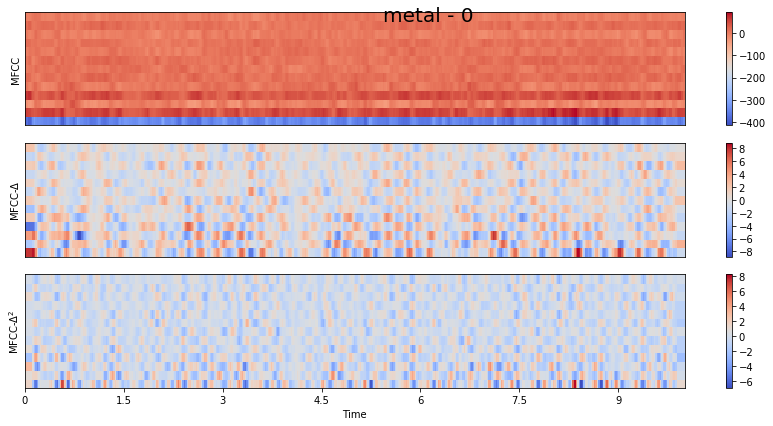

In [34]:
run(genres, numbers, duration=10, start=20, save=False, show=True)

### P3

In [34]:
genres = ['hiphop']
# num = 20
numbers = range(30,35)
duration=10
start=19
figsize=12
save=False
show=False

In [35]:
for genre in genres:
    for i in numbers:
        audio_path = sample_path + genre + '\\' + genre + '.' + str(i).zfill(5) + '.au'
        print(audio_path)
        machine = MFCCMachine(audio_path,genre,str(i))
        machine.process_mfcc(duration=duration, start=start)
        print(machine.mfcc.shape)
        fig = machine.plot_mfcc(figsize=figsize, show=show)
        if save:
#                 fig.savefig(sample_path + genre + '\\' + genre + '.' + str(i).zfill(5) + '.png')
            file_path = data_path + genre + '\\' + genre + '.' + str(i).zfill(5)
            print(file_path+'.npy')
            np.save(file_path, machine.mfcc)

D:\skola\VMM\DataSet\mfcc\input\genres\hiphop\hiphop.00030.au
(639450,)
(13, 431)
D:\skola\VMM\DataSet\mfcc\input\genres\hiphop\hiphop.00031.au
(639450,)
(13, 431)
D:\skola\VMM\DataSet\mfcc\input\genres\hiphop\hiphop.00032.au
(639450,)
(13, 431)
D:\skola\VMM\DataSet\mfcc\input\genres\hiphop\hiphop.00033.au
(639450,)
(13, 431)
D:\skola\VMM\DataSet\mfcc\input\genres\hiphop\hiphop.00034.au
(639450,)
(13, 431)
